## Recurrent neural network (RNN):                                        

In [ ]:
#importing necessary libraries for RNN Text Generation using tensorflow, numpy
import tensorflow as tf

#Numpy win the context of RNN will help in converting Sequential Text Data to Vectorized Text Data for the Numerical representation of Data
import numpy as np

# For creating checkpoints and use the latest check with least lose fucntion to generate the text
import os
import time

Importing the **hound of the baskervilles by Arthur Conan Doyle** file into the colab environment.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hound.txt to hound.txt


Reading the File and Printing the number of characters from Text File

In [ ]:
# Read, then decode for UTF Compact.
text = open('hound.txt', 'rb').read().decode(encoding='utf-8')

# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

Length of text: 328031 characters


Printing the sample from the Text File

In [ ]:
#Printing the Sample first 1000 characters for the text file
print(text[:1000])

:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:
         -----=====Earth's Dreamlands=====-----
           (313)558-5024 {14.4} (313)558-5517
              A BBS for text file junkies
              RPGNet GM File Archive Site
.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.

                      Chapter 1
                 Mr. Sherlock Holmes

  Mr. Sherlock Holmes, who was usually very late in the
mornings, save upon those not infrequent occasions when he was
up all night, was seated at the breakfast table. I stood upon the
hearth-rug and picked up the stick which our visitor had left
behind him the night before. It was a fine, thick piece of wood,
bulbous-headed, of the sort which is known as a "Penang law-
yer." Just under the head was a broad silver band nearly an inch
across. "To James Mortimer, M.R.C.S., from his friends of the
C.C.H.," was engraved upon it, with the date "1884." It was
just such a stick as the old-fashioned family pr


Sorting and Finding the unique characters (To analyze the distinct values which will be helpful in text generation)

In [ ]:
# Passing the text to set which will make the distinct characters and sort based the available words
vocab = sorted(set(text))

# Format will print the unique length of the characters
print ('{} unique characters'.format(len(vocab)))

81 unique characters


Text as Int and creating a mapping to indices

In [ ]:
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

#text_as_int
text_as_int = np.array([char2idx[c] for c in text])
char2idx

# Each Character will be assigned with unique number value

{'\n': 0,
 '\r': 1,
 '\x1a': 2,
 ' ': 3,
 '!': 4,
 '"': 5,
 "'": 6,
 '(': 7,
 ')': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '0': 12,
 '1': 13,
 '2': 14,
 '3': 15,
 '4': 16,
 '5': 17,
 '6': 18,
 '7': 19,
 '8': 20,
 '9': 21,
 ':': 22,
 ';': 23,
 '=': 24,
 '?': 25,
 'A': 26,
 'B': 27,
 'C': 28,
 'D': 29,
 'E': 30,
 'F': 31,
 'G': 32,
 'H': 33,
 'I': 34,
 'J': 35,
 'K': 36,
 'L': 37,
 'M': 38,
 'N': 39,
 'O': 40,
 'P': 41,
 'Q': 42,
 'R': 43,
 'S': 44,
 'T': 45,
 'U': 46,
 'V': 47,
 'W': 48,
 'Y': 49,
 '[': 50,
 ']': 51,
 'a': 52,
 'b': 53,
 'c': 54,
 'd': 55,
 'e': 56,
 'f': 57,
 'g': 58,
 'h': 59,
 'i': 60,
 'j': 61,
 'k': 62,
 'l': 63,
 'm': 64,
 'n': 65,
 'o': 66,
 'p': 67,
 'q': 68,
 'r': 69,
 's': 70,
 't': 71,
 'u': 72,
 'v': 73,
 'w': 74,
 'x': 75,
 'y': 76,
 'z': 77,
 '{': 78,
 '}': 79,
 '~': 80}

The prediction task

The task we are training the model to perform is regarding the most probable next character.

The input to the model will be a sequence of characters, and we train the model to predict the output—the following character at each time step.

Since RNNs maintain an internal state that depends on the previously seen elements, given all the characters computed until this moment, what is the next character?

Create training examples and targets

Next divide the text into example sequences. Each input sequence will contain seq_length characters from the text.

For each input sequence, the corresponding targets contain the same length of text, except shifted one character to the right.

So break the text into chunks of seq_length+1. For example, say seq_length is 4 and our text is "Hello". The input sequence would be "Hell", and the target sequence "ello".

To do this first use the tf.data.Dataset.from_tensor_slices function to convert the text vector into a stream of character indices.

In [ ]:
# The maximum length sentence we want for a single input in characters
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

# Sample data from the char dataset
for i in char_dataset.take(100):
  print(idx2char[i.numpy()])

:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:
.
:



 
 
 
 
 
 
 
 
 
-
-
-
-
-
=
=
=
=
=
E
a
r
t
h
'
s
 
D
r
e
a
m
l
a
n
d
s


The batch method lets us easily convert these individual characters to sequences of the desired size.

In [ ]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)
# Sample looping of sequences for display of vectorized text.
for item in sequences.take(100):
  print(repr(''.join(idx2char[item.numpy()])))

":.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:\r\n         -----=====Earth's Dreamlands="
'====-----\r\n           (313)558-5024 {14.4} (313)558-5517\r\n              A BBS for text file junkies\r\n'
'              RPGNet GM File Archive Site\r\n.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:'
'.:.\r\n\r\n                      Chapter 1\r\n                 Mr. Sherlock Holmes\r\n\r\n  Mr. Sherlock Holmes'
', who was usually very late in the\r\nmornings, save upon those not infrequent occasions when he was\r\nu'
'p all night, was seated at the breakfast table. I stood upon the\r\nhearth-rug and picked up the stick '
'which our visitor had left\r\nbehind him the night before. It was a fine, thick piece of wood,\r\nbulbous'
'-headed, of the sort which is known as a "Penang law-\r\nyer." Just under the head was a broad silver b'
'and nearly an inch\r\nacross. "To James Mortimer, M.R.C.S., from his friends of the\r\nC.C.H.," was engra'
'ved upon it, with the date 

For each sequence, duplicate and shift it to form the input and target text by using the map method to apply a simple function to each batch:

In [ ]:
# Spliting the input and target text
def split_input_target(chunk):
  input_text = chunk[:-1]
  target_text = chunk[1:]
  return input_text, target_text

# Mapping the dataset with split input target
dataset = sequences.map(split_input_target)

Print the first examples input and target values:

In [ ]:
# Formalizing the input and target text from dataset printing the sample one row
for input_example, target_example in  dataset.take(1):
  print ('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
  print ('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  ":.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:\r\n         -----=====Earth's Dreamlands"
Target data: ".:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:.:\r\n         -----=====Earth's Dreamlands="


## Create training batches

Used tf.data to split the text into manageable sequences. But before feeding this data into the model, we need to shuffle the data and pack it into batches.

Big batch size speeds up the training, and even have better generalization performances

In [ ]:
# Batch size
BATCH_SIZE = 128

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset element_spec=(TensorSpec(shape=(128, 100), dtype=tf.int64, name=None), TensorSpec(shape=(128, 100), dtype=tf.int64, name=None))>

In [ ]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

Building The Model

Using tf.keras.Sequential to define the model. For this example three layers are used to define our model:

**tf.keras.layers.Embedding:** The input layer. A trainable lookup table that will map the numbers of each character to a vector with embedding_dim dimensions;

**tf.keras.layers.GRU:** A type of RNN with size units=rnn_units (You can also use a LSTM layer here. But it will be done once we get the desired results from first model)

**tf.keras.layers.Dense**: The output layer, with vocab_size outputs.

In [ ]:
# Model Building

def build_model(vocab_size, 
                embedding_dim, 
                rnn_units, 
                batch_size):
  
  # Sequential Model - As the  model has multiple text inputs or multiple text outputs. Any of the layers has multiple inputs or multiple outputs should be having Sequential model as base. 
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                              embedding_dim,
                              batch_input_shape=[batch_size, None]),
                               
    # Gated Recurrent Unit -  Will be used as a gating mechanism in recurrent neural networks                           
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
                        
    # Setting the vocab size as Dense Layer
    tf.keras.layers.Dense(vocab_size)
  ])

  return model

In [ ]:
# model Definition with calling to build model
model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

The model is run to see that it behaves as expected.

checking the shape of the output:

In the above example the sequence length of the input is 100 but the model can be run on inputs of any length:

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")
  model.summary()

(128, 100, 81) # (batch_size, sequence_length, vocab_size)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (128, None, 256)          20736     
                                                                 
 gru (GRU)                   (128, None, 1024)         3938304   
                                                                 
 dense (Dense)               (128, None, 81)           83025     
                                                                 
Total params: 4,042,065
Trainable params: 4,042,065
Non-trainable params: 0
_________________________________________________________________


To get actual predictions from the model we need to sample from the output distribution, to get actual character indices. This distribution is defined by the logits over the character vocabulary.

Note: It is important to sample from this distribution as taking the argmax of the distribution can easily get the model stuck in a loop.

For the first example in the batch:

In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()
#This gives us, at each timestep, a prediction of the next character index:
sampled_indices

array([33, 14,  0, 41, 48, 49, 30, 65, 15, 29,  3, 54, 21, 72, 79,  6, 19,
        0, 73, 45, 55, 51, 35, 72, 60, 32, 70, 66, 64, 54, 25, 55, 25, 27,
       25, 65, 31, 52, 65, 34,  6, 57, 71,  7,  8, 56, 39, 30, 47, 13, 66,
       65,  5, 15, 58, 12, 10, 19, 14, 31, 11, 19,  5,  3, 39, 13, 57,  4,
       27, 41, 55, 43, 73, 30, 29, 49, 50, 77, 69, 41, 28, 68,  5, 48, 22,
        4, 38, 73,  5,  4, 27,  2, 77, 16, 60, 53, 29, 60, 18,  1])

Train the model

At this point the problem can be treated as a standard classification problem. Given the previous RNN state, and the input this time step, predict the class of the next character.

Attach an optimizer, and a loss function The standard tf.keras.losses.sparse_categorical_crossentropy loss function works in this case because it is applied across the last dimension of the predictions.

Because our model returns logits, we need to set the from_logits flag.

In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

example_batch_loss  = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (128, 100, 81)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.3949122


Configure the training procedure using the tf.keras.Model.compile method. Using tf.keras.optimizers.Adam with default arguments and the loss function.

In [ ]:
model.compile(optimizer='adam', loss=loss)

Configure checkpoints

Use a tf.keras.callbacks.ModelCheckpoint to ensure that checkpoints are saved during training:

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

Execute the training

Using 10 epochs to train the model.

In [ ]:
EPOCHS = 10
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/10
25/25 [==============================] - 8s 211ms/step - loss: 4.0817
Epoch 2/10
25/25 [==============================] - 6s 209ms/step - loss: 2.8654
Epoch 3/10
25/25 [==============================] - 6s 211ms/step - loss: 2.5135
Epoch 4/10
25/25 [==============================] - 6s 210ms/step - loss: 2.3470
Epoch 5/10
25/25 [==============================] - 6s 213ms/step - loss: 2.2368
Epoch 6/10
25/25 [==============================] - 6s 207ms/step - loss: 2.1491
Epoch 7/10
25/25 [==============================] - 6s 213ms/step - loss: 2.0647
Epoch 8/10
25/25 [==============================] - 6s 207ms/step - loss: 1.9841
Epoch 9/10
25/25 [==============================] - 6s 214ms/step - loss: 1.9086
Epoch 10/10
25/25 [==============================] - 6s 216ms/step - loss: 1.8401


Ploting the loss against the epochs.

In [ ]:
import matplotlib.pyplot as plt

# Plotting the graph between epochs and loss function
def plot_accuracy(history):
  plt.plot(history.history['loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['loss'], loc='upper right')
  plt.show()

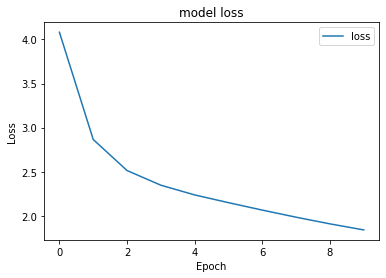

In [ ]:
plot_accuracy(history)

To run the model with a different batch_size, we need to rebuild the model and restore the weights from the checkpoint.

In [ ]:
# Intilizing the latest check point
tf.train.latest_checkpoint(checkpoint_dir)

# Model build
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size = 1)

# Loading the weights from latest checkpoint from directory
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

# Re-building the model
model.build(tf.TensorShape([1, None]))

# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (1, None, 256)            20736     
                                                                 
 gru_1 (GRU)                 (1, None, 1024)           3938304   
                                                                 
 dense_1 (Dense)             (1, None, 81)             83025     
                                                                 
Total params: 4,042,065
Trainable params: 4,042,065
Non-trainable params: 0
_________________________________________________________________


The prediction loop

The following code block generates the text:

It Starts by choosing a start string, initializing the RNN state and setting the number of characters to generate.

In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
    predictions = model(input_eval)
    # remove the batch dimension
    predictions = tf.squeeze(predictions, 0)

    # using a categorical distribution to predict the character returned by the model
    predictions = predictions / temperature
    predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

    # We pass the predicted character as the next input to the model
    # along with the previous hidden state
    input_eval = tf.expand_dims([predicted_id], 0)

    text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

In [ ]:
print(generate_text(model, start_string=u"Mr. Sherlock Holmes: "))

Mr. Sherlock Holmes: gakner. Bur own, wall wost to-
shapse spoplacinion an wot's
fireste, and of the obse very tle tolleshed to is
fardowe have no who, mar you
reing follow. Af the medy lige doing wire beave corie sivared to biken foild On-than we hounds bus rogrll wis, swinks-
   - thell should in. There him exuntio s me, and his you have wancs dorded."
  "Whene
detcow
he orcesthed, and noud wilat
wo
dart be fire betion ass
seer! thinger, the joor foresiby of his spoicer in your saintor," Thay been upon framicilactlared aprertmon that gore at
tweptly that his thisgobed and frem? I as
explealling wo sorded fromd readice, well
  whit of instind Evimibil mo.."   ha
clacclowions in was leavily of jervide of hives th the choully oftive it ture loke intouth the lecimes, ads
ont is niths upteen ald thim now to neverter, sarden. What illaid I aplits as!" I that thes, and wawnted, and ditury soknt
the copeathor."
  "Helly'd it inyond wif Hely
fond, the blay was flack
breare his the had a vrope

Looking at the generated text, you'll see the model knows when to capitalize, make paragraphs and imitates a hound of baskerville - like writing vocabulary. With the small number of training epochs, it has not yet learned to form coherent sentences.                                                          Need to improve the model by additional changes considering hyperparameters

Using an LSTM with sigmoid' as recurrent_activation and 'tanh' as activation and have also added Dropout and dense layers.

**Why LSTM ?**
LSTM can solve the problem for coherenet sentences for text generation with enhanced behaviour, because it uses gates to control the memorizing process.

**Why tanh?**
To overcome the vanishing gradient problem, we need a function whose second derivative can sustain for a long range before going to zero. tanh is a suitable function with the above property.


**Why Sigmoid?**
As Sigmoid can output 0 or 1, it can be used to forget or remember the information.


In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):

  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 
                              embedding_dim,
                              batch_input_shape=[batch_size, None]),
    # Hyper Parameter One                          
    # LSTM has feedback connections. It can process not only single data points , but also entire sequences of data.      
    tf.keras.layers.LSTM(rnn_units,
                         activation='tanh', 
                         recurrent_activation='sigmoid',
                         return_sequences=True,
                         stateful=True,
                         recurrent_initializer='glorot_uniform'),

    # Hyper Parameter Two  (Adding Additional hiden Layer)
    # Setting the Dense to 50
    tf.keras.layers.Dense(50),

    # Hyper Parameter Three
    # Setting the Dropout top 0.2
    # Dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. 
    # By “ignoring”, they are not considered during a particular forward or backward pass.
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(vocab_size)

  ])

  return model

In [ ]:
model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

Running the model to see that it behaves as expected and checking the shape of the output:

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):

  example_batch_predictions = model(input_example_batch)

  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")
  
  model.summary()

(128, 100, 81) # (batch_size, sequence_length, vocab_size)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (128, None, 256)          20736     
                                                                 
 lstm (LSTM)                 (128, None, 1024)         5246976   
                                                                 
 dense_2 (Dense)             (128, None, 50)           51250     
                                                                 
 dropout (Dropout)           (128, None, 50)           0         
                                                                 
 dense_3 (Dense)             (128, None, 81)           4131      
                                                                 
Total params: 5,323,093
Trainable params: 5,323,093
Non-trainable params: 0
___________________________________________________

To get actual predictions from the model we need to sample from the output distribution, to get actual character indices. This distribution is defined by the logits over the character vocabulary.

Note: It is important to sample from this distribution as taking the argmax of the distribution can easily get the model stuck in a loop.

For the first example in the batch:

In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)

sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

#This gives us, at each timestep, a prediction of the next character index:
sampled_indices

array([37, 61, 65,  7, 58, 71,  4, 23, 11, 59, 46, 61, 65, 55, 13, 52, 50,
       74, 28, 36, 60, 30, 21, 22, 15, 33, 30, 49, 72, 22, 60, 44, 33, 40,
       59,  9, 46, 37,  5, 79, 59, 13, 20, 10, 48, 73, 73, 69, 46,  1, 60,
       39, 14,  2, 74,  9, 18, 58, 19,  9,  7, 45, 10, 27, 50,  8, 33, 77,
       80, 44,  2, 35, 62, 71,  1, 63, 49, 59, 44, 70, 16, 57, 76, 45, 71,
       20, 67, 15, 15, 63, 69, 27,  1, 59, 17, 52, 25, 17, 22, 80])

Training the model

In [ ]:
def loss(labels, logits):
  return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

example_batch_loss  = loss(target_example_batch, example_batch_predictions)

print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss:      ", example_batch_loss.numpy().mean())


Prediction shape:  (128, 100, 81)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.3947277


Here, We are changing the optimizer to 'RMSprop'

The gist of RMSprop is to:

•	Maintain a moving (discounted) average of the square of gradients
•	Divide the gradient by the root of this average

This implementation of RMSprop uses plain momentum, not Nesterov momentum.
The cantered version additionally maintains a moving average of the gradients and uses that average to estimate the variance.




In [ ]:
# Hyper Parameter Four (Change of Optimizer)
model.compile(optimizer='RMSprop', loss=loss)

Configure checkpoints

Use a tf.keras.callbacks.ModelCheckpoint to ensure that checkpoints are saved during training:

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'

# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

Here, I am using 20 epochs to train the model.

In [ ]:
EPOCHS = 20
history = model.fit(dataset, epochs = EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
25/25 [==============================] - 9s 268ms/step - loss: 4.0376
Epoch 2/20
25/25 [==============================] - 7s 269ms/step - loss: 3.1373
Epoch 3/20
25/25 [==============================] - 7s 263ms/step - loss: 2.7531
Epoch 4/20
25/25 [==============================] - 7s 271ms/step - loss: 2.5228
Epoch 5/20
25/25 [==============================] - 7s 263ms/step - loss: 2.3406
Epoch 6/20
25/25 [==============================] - 7s 272ms/step - loss: 2.2029
Epoch 7/20
25/25 [==============================] - 7s 266ms/step - loss: 2.0822
Epoch 8/20
25/25 [==============================] - 7s 271ms/step - loss: 1.9729
Epoch 9/20
25/25 [==============================] - 7s 266ms/step - loss: 1.8785
Epoch 10/20
25/25 [==============================] - 7s 266ms/step - loss: 1.7931
Epoch 11/20
25/25 [==============================] - 7s 266ms/step - loss: 1.7228
Epoch 12/20
25/25 [==============================] - 7s 271ms/step - loss: 1.6574
Epoch 13/20
25/25 [======

In [ ]:
import matplotlib.pyplot as plt

# Plotting the graph between epochs and loss function
def plot_accuracy(history):
  plt.plot(history.history['loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['loss'], loc='upper right')
  plt.show()

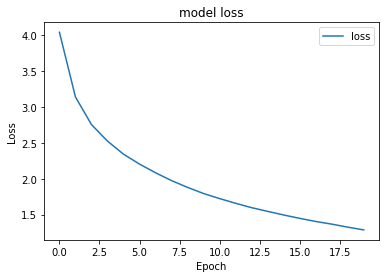

In [ ]:
plot_accuracy(history)

In [ ]:
EPOCHS = 50
history = model.fit(dataset, epochs = EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/50
25/25 [==============================] - 7s 272ms/step - loss: 1.2512
Epoch 2/50
25/25 [==============================] - 7s 265ms/step - loss: 1.2094
Epoch 3/50
25/25 [==============================] - 7s 266ms/step - loss: 1.1782
Epoch 4/50
25/25 [==============================] - 7s 272ms/step - loss: 1.1418
Epoch 5/50
25/25 [==============================] - 7s 266ms/step - loss: 1.1013
Epoch 6/50
25/25 [==============================] - 7s 270ms/step - loss: 1.0661
Epoch 7/50
25/25 [==============================] - 7s 271ms/step - loss: 1.0297
Epoch 8/50
25/25 [==============================] - 7s 270ms/step - loss: 0.9904
Epoch 9/50
25/25 [==============================] - 7s 272ms/step - loss: 0.9518
Epoch 10/50
25/25 [==============================] - 7s 266ms/step - loss: 0.9218
Epoch 11/50
25/25 [==============================] - 7s 269ms/step - loss: 0.8825
Epoch 12/50
25/25 [==============================] - 7s 270ms/step - loss: 0.8502
Epoch 13/50
25/25 [======

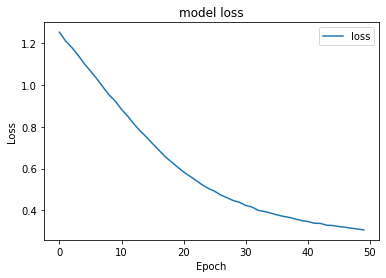

In [ ]:
plot_accuracy(history)

Generate text

Restore the latest checkpoint
To keep this prediction step simple, use a batch size of 1.

Because of the way the RNN state is passed from timestep to timestep, the model only accepts a fixed batch size once built.

To run the model with a different batch_size, we need to rebuild the model and restore the weights from the checkpoint.

In [ ]:
# Intilizing the latest check point
tf.train.latest_checkpoint(checkpoint_dir)

# Model build
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size = 1)

# Loading the weights from latest checkpoint from directory
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

# Re-building the model
model.build(tf.TensorShape([1, None]))

# Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (1, None, 256)            20736     
                                                                 
 lstm_1 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_4 (Dense)             (1, None, 50)             51250     
                                                                 
 dropout_1 (Dropout)         (1, None, 50)             0         
                                                                 
 dense_5 (Dense)             (1, None, 81)             4131      
                                                                 
Total params: 5,323,093
Trainable params: 5,323,093
Non-trainable params: 0
_________________________________________________________________


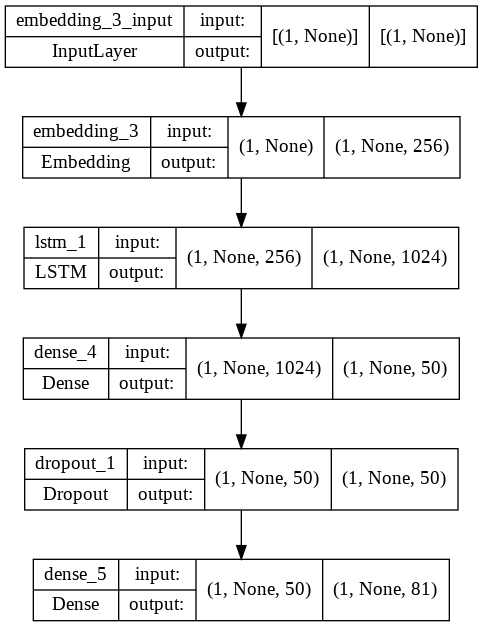

In [ ]:
# Model Visualization
tf.keras.utils.plot_model(model, show_shapes = True, show_layer_names = True)

The prediction loop

The following code block generates the text:

It Starts by choosing a start string, initializing the RNN state and setting the number of characters to generate.

Get the prediction distribution of the next character using the start string and the RNN state.

Then, use a categorical distribution to calculate the index of the predicted character. Use this predicted character as our next input to the model.

The RNN state returned by the model is fed back into the model so that it now has more context, instead than only one character. After predicting the next character, the modified RNN states are again fed back into the model, which is how it learns as it gets more context from the previously predicted characters.

In [ ]:
def generate_text(model, start_string):
  # Evaluation step (generating text using the learned model)

  # Number of characters to generate
  num_generate = 1000

  # Converting our start string to numbers (vectorizing)
  input_eval = [char2idx[s] for s in start_string]
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Low temperatures results in more predictable text.
  # Higher temperatures results in more surprising text.
  # Experiment to find the best setting.
  temperature = 1.0

  # Here batch size == 1
  model.reset_states()
  for i in range(num_generate):
    predictions = model(input_eval)
    # remove the batch dimension
    predictions = tf.squeeze(predictions, 0)

    # using a categorical distribution to predict the character returned by the model
    predictions = predictions / temperature
    predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

    # We pass the predicted character as the next input to the model
    # along with the previous hidden state
    input_eval = tf.expand_dims([predicted_id], 0)

    text_generated.append(idx2char[predicted_id])

  return (start_string + ''.join(text_generated))

Looking at the generated text, you'll see the model knows when to capitalize, make paragraphs and imitates a hound of baskerville - like writing vocabulary. With the more number of training epochs, it has formed coherent sentences.

In [ ]:
print(generate_text(model, start_string=u"mr. sherlock holmes: "))

mr. sherlock holmes: shames convict upon the succession."
  "Exactly. This chance of the Mrire to came to this morth Cross Mortider that she was telling the truth, or, the resile grown by a stealthy
step passible round the tor of something to me kits you," said I.
  "Yes, I am Evormed to see you Mr. Mortimer, but they shilling-
ing it his deligiant streams with creved
she looked the most cigarettes
without my freended in bent and
pursuit we have got a lict! In this great for the arrival in
the following presents several be luvid you to delice the man down to discover
myself until I had an entered the stone huts would give you my leison where you are gethere is no reason Charing
my edes first or visit the fog was lobes expecting that ly connection with the famous card in my pocket
with these were up in my power  with the trae, and the present asion of some more
and from the soutTor was theer that some foul kepolort to be supernatural. You could
had to sen this, the fellow speck us nothi

In [ ]:
print(generate_text(model, start_string=u"hound: "))

hound: I as Dr. Mortimer, "why should we not seize it, my inst the dew blacker and ske will contino Husy until the our
side wo watching fellow who were for the stone huts would give them the
while with a skering glance in one of these slidder and smot the tosse been mind to the story of the family, though I never thought of taking
it seriously been confined to the indee of the nature of years. That is wish that you stimulated me I meant, to ; Holmes
sat the old falling blifart which took a house out of the twe, diswict the investi
window. The setting out on the interest which he took in our curious companion.
  "I presume, sir," said he at last, "there is a woman's eyes that
she was a beard mirethe broad moor, and behind him the direct of his
fanien and read in orry on the stable. From the time
ten in such haste. Bith obtain with our friend fit fear from the
     inightral telegram to the special eing  gr some little time you a tell them that I have none
thinknot of your foodgent t
